In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv(r'G:\Capstone Project Dataset\Used cars price prediction\train-data.csv')

In [4]:
train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# 1. Data Cleaning

# * Remove irrelevant columns

In [5]:
train_df.drop('Unnamed: 0', axis = 1, inplace = True)

# * Shape

In [6]:
print('Shape:', train_df.shape)

Shape: (6019, 13)


* Rows: 6019

* Columns: 13

# * Rename column names 

In [7]:
print(train_df.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [8]:
train_df.rename(columns = {'Name': 'name', 'Location': 'location', 'Year': 'year', 'Kilometers_Driven': 'kilometers', 'Fuel_Type': 'fuel_type',
                     'Transmission': 'transmission','Owner_Type': 'owner_type', 'Mileage': 'mileage', 'Engine': 'engine', 'Power': 'power', "Seats": 'seats', 
                     'New_Price': 'new_price', 'Price': 'price'}, inplace = True)

In [9]:
train_df.head()

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# * Check missing values

In [10]:
train_df.isnull().sum()

name               0
location           0
year               0
kilometers         0
fuel_type          0
transmission       0
owner_type         0
mileage            2
engine            36
power             36
seats             42
new_price       5195
price              0
dtype: int64

In [11]:
train_missing_values = train_df.isnull().sum()
train_missing_values_percent = train_missing_values/train_df.shape[0] * 100

In [12]:
train_missing_data = pd.DataFrame({'Total number of missing values': train_missing_values,
                             'Percentage of missing values': train_missing_values_percent})

In [13]:
train_missing_data

,Total number of missing values,Percentage of missing values
name,0,0.000000
location,0,0.000000
year,0,0.000000
kilometers,0,0.000000
fuel_type,0,0.000000
transmission,0,0.000000
owner_type,0,0.000000
mileage,2,0.033228
engine,36,0.598106
power,36,0.598106


* We have null values in:

1. Mileage - 0.03%

2. Engine - 0.59%
 

3. Power - 0.59%

4. Seats - 0.69%
          
5. New Price - 86%
             
* Since, New Price contains 86% null data, we can drop this column.

* We can also drop those rows which contain null values, because their numbers are very less.

In [14]:
train_df.drop('new_price', axis = 1, inplace = True )

In [15]:
train_df = train_df.dropna(how = 'any')
train_df.reset_index(drop = True, inplace = True)

In [16]:
print("Shape: ", train_df.shape)

Shape:  (5975, 12)


# * Check data type

In [17]:
train_df.dtypes

name             object
location         object
year              int64
kilometers        int64
fuel_type        object
transmission     object
owner_type       object
mileage          object
engine           object
power            object
seats           float64
price           float64
dtype: object

* Convert "Mileage", "Engine" and "Power" columns into float.

* Note:

1. Numerical values mixed with text in (Mileage, Engine, Power) columns.

2. Power column has values "null bhp"

# Mileage:

In [18]:
train_df['mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [19]:
train_df['mileage'][train_df['mileage'] == 'null kmpl'].count()

0

In [20]:
train_df['mileage'][train_df['mileage'] == 'null km/kg'].count()

0

* Two types of text values are mixed with Mileage column:

1. kmpl = kilometer per litre

2. km/kg = kilometer per kilogram

# Power

In [21]:
train_df['power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [22]:
train_df['power'][train_df['power'] == 'null bhp'].count()

103

In [23]:
train_null_bhp = train_df['power'][train_df['power'] == 'null bhp'].count()
train_null_bhp_percent = train_null_bhp/train_df.shape[0] * 100

In [24]:
print("Null_BHP_Percent: ", train_null_bhp_percent)

Null_BHP_Percent:  1.7238493723849373


* Since 'null bhp' values are only 1.7%. We can drop these rows.

* One text value is mixed with Power column.

     BHP = Brake Horsepower

# Engine

In [25]:
train_df['engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [26]:
train_df['engine'][train_df['engine'] == 'null CC'].count()

0

* One text value is mixed with Engine column. 

     CC = Cubic Capacity

In [27]:
train_df.drop(train_df[train_df['power'] == 'null bhp'].index, inplace = True)
train_df.reset_index(drop = True, inplace = True)

In [28]:
train_df.shape

(5872, 12)

In [29]:
train_df['mileage'] = train_df['mileage'].str.replace('kmpl', '')
train_df['mileage'] = train_df['mileage'].str.replace('km/kg', '')
train_df['power'] = train_df['power'].str.replace('bhp', '')
train_df['engine'] = train_df['engine'].str.replace('CC', '')

In [30]:
train_df

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [31]:
train_df['mileage'] = train_df['mileage'].astype('float64')
train_df['power'] = train_df['power'].astype('float64')
train_df['engine'] = train_df['engine'].astype('float64')

In [32]:
# train data
train_df.dtypes

name             object
location         object
year              int64
kilometers        int64
fuel_type        object
transmission     object
owner_type       object
mileage         float64
engine          float64
power           float64
seats           float64
price           float64
dtype: object

In [33]:
print("Shape: ", train_df.shape)

Shape:  (5872, 12)


# * Summary

In [34]:
train_df.describe()

,year,kilometers,mileage,engine,power,seats,price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Analysis:

      1. Oldest car: Year 1998
      2. Latest car: Year 2019
      3. Maximum mileage: 33.54 kmpl
      4. Minimum mileage: 0.00 kmpl
      5. Engine maximum: 5998 CC
      6. Engine minimum: 624 CC
      7. Maximum power: 560 bhp
      8. Minimum power: 34.20 bhp
      9. Maximum seats: 10
      10. Minimum seats: 2
      11. Maximum price: 1,60,00,000
      12. Minimum Price: 44,000
      

* We have some vehicles whose mileage is showing 0. We will take the median of mileage of their respective category cars and replace all zeros.

In [35]:
train_df[train_df['mileage'] == 0]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,35.67
526,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,38.99
685,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014,120000,Diesel,Automatic,First,0.0,2987.0,165.00,5.0,30.00
932,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,39.50
966,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,0.0,1086.0,62.00,5.0,1.45
1029,Hyundai Santro Xing GL,Hyderabad,2010,58163,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2.45
1226,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,11.00
1273,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2014,33000,Diesel,Automatic,Second,0.0,2987.0,165.00,5.0,43.00
1316,Hyundai Santro Xing GL,Kochi,2011,20842,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2.78


In [36]:
print("Zero Mileage: ", train_df['mileage'][train_df['mileage'] == 0].count())

Zero Mileage:  28


* There are 28 rows where mileage is 0.

# * Engine: 600 - 1500

In [37]:
train_df[(train_df['engine'].between(600, 1500)) & (train_df['mileage'] == 0)]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
966,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,0.0,1086.0,62.0,5.0,1.45
1029,Hyundai Santro Xing GL,Hyderabad,2010,58163,Petrol,Manual,First,0.0,1086.0,62.0,5.0,2.45
1316,Hyundai Santro Xing GL,Kochi,2011,20842,Petrol,Manual,First,0.0,1086.0,62.0,5.0,2.78
2963,Hyundai Santro Xing GL,Kolkata,2009,60170,Petrol,Manual,First,0.0,1086.0,62.0,5.0,1.15
3186,Hyundai Santro Xing GL,Bangalore,2008,35268,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,1.88
4192,Hyundai Santro Xing GL,Delhi,2012,61449,Petrol,Manual,First,0.0,1086.0,62.0,5.0,2.15
5826,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,1.39


* We will take average of mileage of all those vehicles whose engine is 1086 CC.

In [38]:
train_df['mileage'][train_df['engine'] == 1086].median()

19.81

In [39]:
train_indices = [966, 1029, 1316, 2963, 3186, 4192, 5826]

train_df.loc[train_indices,'mileage'] = 19.81

# * Engine: 1500 - 2000

In [40]:
train_df[(train_df['engine'].between(1500, 2000)) & (train_df['mileage'] == 0)]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,35.67
526,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,38.99
932,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,39.50
5732,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,35.00


In [41]:
train_df['mileage'][train_df['engine'] == 1950].median()

6.3

In [42]:
train_indices = [67, 526, 932, 5732]

train_df.loc[train_indices,'mileage'] = 6.3

# * Engine: 2000 - 2500

In [43]:
train_df[(train_df['engine'].between(2000, 2500)) & (train_df['mileage'] == 0)]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50
1226,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,11.00
4571,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,16.50
4888,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,15.50
4894,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,26.00
5178,Land Rover Freelander 2 TD4 SE,Hyderabad,2012,139000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,16.75


In [44]:
train_df['mileage'][train_df['engine'] == 2179].median()

15.1

In [45]:
train_indices = [14, 1226, 4571, 4888, 4894, 5178]

train_df.loc[train_indices,'mileage'] = 15.1

# * Engine: 2500 - 3000

In [46]:
train_df[(train_df['engine'].between(2500, 3000)) & (train_df['mileage'] == 0)]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
685,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014,120000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,30.00
1273,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2014,33000,Diesel,Automatic,Second,0.0,2987.0,165.0,5.0,43.00
1718,Mercedes-Benz M-Class ML 350 4Matic,Pune,2015,69000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,38.00
3011,Audi A7 2011-2015 Sportback,Kolkata,2012,24720,Diesel,Automatic,Second,0.0,2967.0,241.4,5.0,28.00
3126,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,2016,22769,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,49.22
4124,Mercedes-Benz M-Class ML 350 4Matic,Chennai,2012,63000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,26.00
4300,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,2016,27833,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,49.24
4587,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2015,20000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,47.35
5241,Mercedes-Benz M-Class ML 350 4Matic,Ahmedabad,2012,66000,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,23.00


In [47]:
train_df['mileage'][train_df['engine'] == 2987].median()

11.57

In [48]:
train_indices = [685, 1273, 1718, 3011, 3126, 4124, 4300, 4587, 5241]

train_df.loc[train_indices,'mileage'] = 11.57

# * Engine: 3000 - 4000

In [49]:
train_df[(train_df['engine'].between(3000, 4000)) & (train_df['mileage'] == 0)]

,name,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
2605,Skoda Superb 3.6 V6 FSI,Hyderabad,2010,54000,Petrol,Automatic,First,0.0,3597.0,262.6,5.0,6.00
5864,Skoda Superb 3.6 V6 FSI,Hyderabad,2009,53000,Petrol,Automatic,First,0.0,3597.0,262.6,5.0,4.75


In [50]:
train_df['mileage'][train_df['engine'].between(3000, 4000)].median()

10.91

In [51]:
train_indices = [2605, 5864]

train_df.loc[train_indices,'mileage'] = 10.91

# * Extract brand from name column 

In [52]:
# Split Brand name and Model name

Brand_train = []
Model_train = []
for i in train_df['name']:
    x = i.split(" ", 1)
    Brand_train.append(x[0])
    Model_train.append(x[1])

In [53]:
# Change brand name 'Land' to 'Land Rover'

Brand_train = ['Land Rover' if i == 'Land' else i for i in Brand_train]

In [54]:
# Add new columns 'Brand' and 'Model' in dataframe

train_df['brand'] = Brand_train
train_df['model'] = Model_train

In [55]:
# Remove 'Rover' from the model name of brand 'Land Rover'

train_list = []
for i in train_df['model']:
  x = i.split(" ", 1)
  if x[0] == 'Rover':
    train_list.append(x[1])
print("Train: ", train_list)

Train:  ['Range Rover 2.2L Pure', 'Freelander 2 TD4 SE', 'Range Rover 2.2L Dynamic', 'Range Rover HSE Dynamic', 'Range Rover 2.2L Dynamic', 'Range Rover 2.2L Prestige', 'Range Rover 2.2L Pure', 'Range Rover Evoque 2.0 TD4 Pure', 'Range Rover HSE Dynamic', 'Freelander 2 SE', 'Range Rover Evoque 2.0 TD4 HSE Dynamic', 'Range Rover TDV8 (Diesel)', 'Freelander 2 HSE', 'Freelander 2 TD4 S', 'Discovery 4 TDV6 SE', 'Range Rover 3.6 TDV8 Vogue SE Diesel', 'Range Rover Sport SE', 'Range Rover 2.2L Pure', 'Discovery Sport TD4 HSE 7S', 'Freelander 2 SE', 'Range Rover Evoque 2.0 TD4 Pure', 'Discovery HSE Luxury 3.0 TD6', 'Range Rover 2.2L Prestige', 'Range Rover Sport 2005 2012 HSE', 'Discovery SE 3.0 TD6', 'Range Rover HSE Dynamic', 'Discovery Sport TD4 HSE', 'Range Rover 2.2L Dynamic', 'Range Rover Vogue SE 4.4 SDV8', 'Freelander 2 HSE SD4', 'Discovery Sport SD4 HSE Luxury 7S', 'Range Rover Sport HSE', 'Discovery 3 TDV6 Diesel Automatic', 'Discovery Sport TD4 HSE', 'Range Rover 3.0 Diesel LWB Vog

In [56]:
train_df[train_df['brand'] == 'Land Rover'].index

Int64Index([  13,   14,  186,  298,  385,  390,  396,  462,  503,  679,  911,
            1008, 1171, 1226, 1264, 1314, 1463, 1471, 1525, 1940, 2086, 2124,
            2208, 2248, 2460, 2844, 2962, 3134, 3158, 3322, 3447, 3653, 3738,
            3952, 3972, 4137, 4353, 4514, 4571, 4584, 4634, 4680, 4693, 4747,
            4800, 4888, 4894, 4910, 4938, 5178, 5249, 5278, 5283, 5341, 5393,
            5401, 5407],
           dtype='int64')

In [57]:
train_indices = [13,   14,  186,  298,  385,  390,  396,  462,  503,  679,  911,
            1008, 1171, 1226, 1264, 1314, 1463, 1471, 1525, 1940, 2086, 2124,
            2208, 2248, 2460, 2844, 2962, 3134, 3158, 3322, 3447, 3653, 3738,
            3952, 3972, 4137, 4353, 4514, 4571, 4584, 4634, 4680, 4693, 4747,
            4800, 4888, 4894, 4910, 4938, 5178, 5249, 5278, 5283, 5341, 5393,
            5401, 5407]

train_df.loc[train_indices,'model'] = ['Range Rover 2.2L Pure', 'Freelander 2 TD4 SE', 'Range Rover 2.2L Dynamic', 'Range Rover HSE Dynamic', 'Range Rover 2.2L Dynamic', 'Range Rover 2.2L Prestige', 'Range Rover 2.2L Pure', 'Range Rover Evoque 2.0 TD4 Pure', 'Range Rover HSE Dynamic', 'Freelander 2 SE', 'Range Rover Evoque 2.0 TD4 HSE Dynamic', 'Range Rover TDV8 (Diesel)', 'Freelander 2 HSE', 'Freelander 2 TD4 S', 'Discovery 4 TDV6 SE', 'Range Rover 3.6 TDV8 Vogue SE Diesel', 'Range Rover Sport SE', 'Range Rover 2.2L Pure', 'Discovery Sport TD4 HSE 7S', 'Freelander 2 SE', 'Range Rover Evoque 2.0 TD4 Pure', 'Discovery HSE Luxury 3.0 TD6', 'Range Rover 2.2L Prestige', 'Range Rover Sport 2005 2012 HSE', 'Discovery SE 3.0 TD6', 'Range Rover HSE Dynamic', 'Discovery Sport TD4 HSE', 'Range Rover 2.2L Dynamic', 'Range Rover Vogue SE 4.4 SDV8', 'Freelander 2 HSE SD4', 'Discovery Sport SD4 HSE Luxury 7S', 'Range Rover Sport HSE', 'Discovery 3 TDV6 Diesel Automatic', 'Discovery Sport TD4 HSE', 'Range Rover 3.0 Diesel LWB Vogue', 'Freelander 2 SE', 'Freelander 2 SE', 'Freelander 2 HSE', 'Freelander 2 TD4 SE', 'Freelander 2 SE', 'Range Rover Evoque 2.0 TD4 HSE Dynamic', 'Freelander 2 SE', 'Freelander 2 SE', 'Range Rover 3.6 TDV8 Vogue SE', 'Discovery Sport TD4 S', 'Freelander 2 TD4 HSE', 'Freelander 2 TD4 SE', 'Discovery Sport TD4 HSE 7S', 'Discovery Sport SD4 HSE Luxury 7S', 'Freelander 2 TD4 SE', 'Range Rover 2.2L Prestige', 'Range Rover 2.2L Pure', 'Range Rover Vogue SE 4.4 SDV8', 'Range Rover HSE Dynamic', 'Freelander 2 SE', 'Discovery Sport SD4 HSE Luxury', 'Range Rover Sport SE']

In [58]:
# Drop 'name' column

train_df.drop('name', axis = 1, inplace = True)

In [59]:
train_df.head()

,location,year,kilometers,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,brand,model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [60]:
print("Shape: ", train_df.shape)

Shape:  (5872, 13)


# * Check duplicate data

In [61]:
print("Duplicate data: ", train_df.duplicated().sum())

Duplicate data:  0


* There are no duplicate data in our dataset.

# 2. EDA

# * Univariate Analysis:

#1. Price

<Axes: xlabel='price', ylabel='Density'>

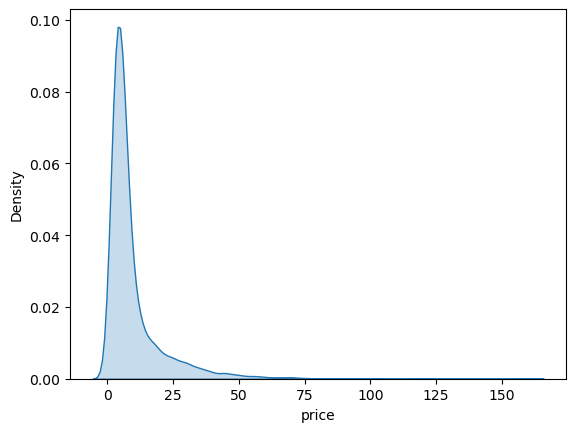

In [62]:
sns.kdeplot(x = 'price', data = train_df, fill = True)

In [63]:
print("Skewness: ", train_df['price'].skew())

Skewness:  3.3230887805574807


* The distribution of price shows highly positive skewness (Right Skewed). It should be in range (-2, +2). It shows that there are outliers in our data.



In [64]:
train_df['price'] = np.log(train_df['price'])

In [65]:
print("Skewness after log transformation: ", train_df['price'].skew())

Skewness after log transformation:  0.4432126477722652


Text(0.5, 1.0, 'Distribution of price after log transformation')

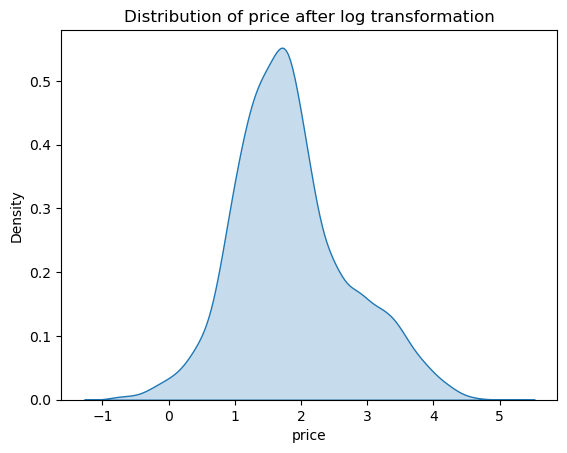

In [66]:
sns.kdeplot(x = 'price', data = train_df, fill = True)
plt.title('Distribution of price after log transformation')

* Hence, log transformation of price is providing better distribution with good skewness value i.e. 0.44. 

# 2. Brand 

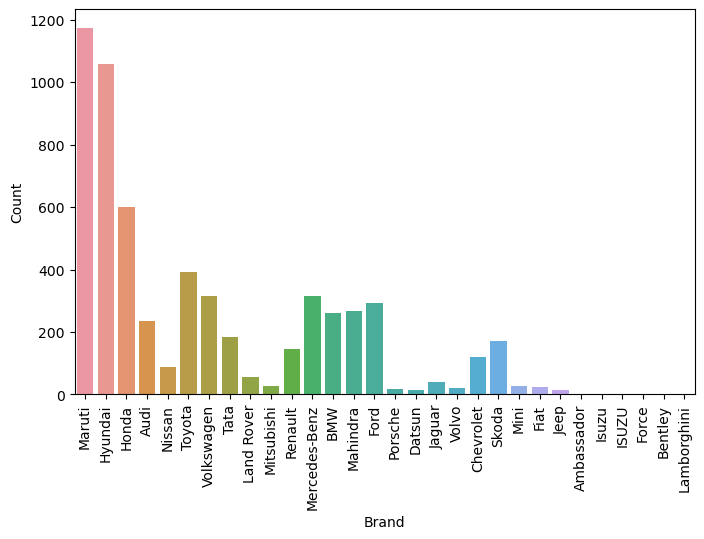

In [67]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'brand', data = train_df)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [68]:
pd.DataFrame(train_df['brand'].value_counts())

,brand
Maruti,1175
Hyundai,1058
Honda,600
Toyota,394
Mercedes-Benz,316
Volkswagen,314
Ford,294
Mahindra,268
BMW,262
Audi,235


* Maruti is most popular brand followed by Hyundai.

* In order to prevent modeling issues, we will only consider those brands which have more than 10 vehicles.

In [69]:
train_df = train_df[~train_df['brand'].isin(['Force', 'ISUZU', 'Ambassador', 'Isuzu', 'Bentley', 'Lamborghini'])]
train_df.reset_index(drop = True, inplace = True)

In [70]:
train_df.shape

(5863, 13)

# 3. Location 

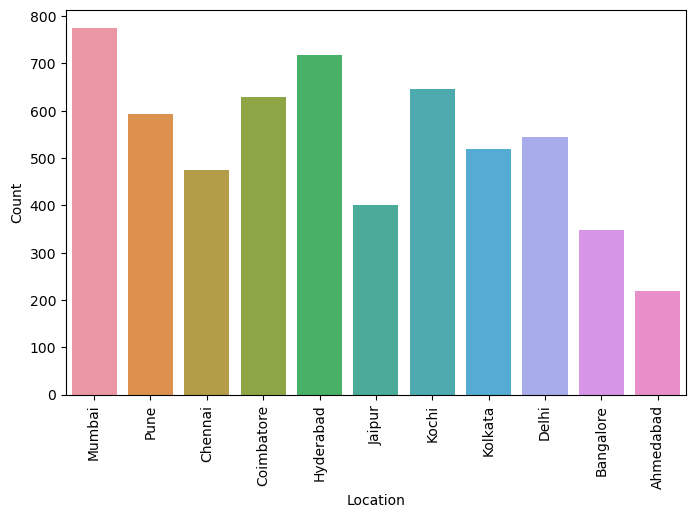

In [71]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'location', data = train_df)
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [72]:
pd.DataFrame(train_df['location'].value_counts())

,location
Mumbai,775
Hyderabad,717
Kochi,645
Coimbatore,628
Pune,594
Delhi,544
Kolkata,519
Chennai,474
Jaipur,400
Bangalore,347


* Most of the used cars are from Mumbai followed by Hyderabad.

# 4. Year

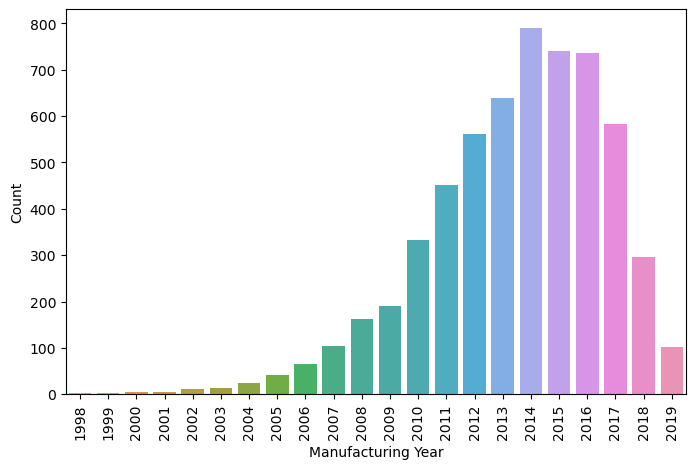

In [73]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'year', data = train_df)
plt.xlabel('Manufacturing Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [74]:
pd.DataFrame(train_df['year'].value_counts())

,year
2014,791
2015,740
2016,737
2013,639
2017,584
2012,562
2011,451
2010,333
2018,297
2009,191


* Most of the used cars are manufactured in the year 2104.

* In order to prevent modeling issues, we will only consider those year which have more than 10 count.

In [75]:
train_df = train_df[~train_df['year'].isin([2000, 2001, 1998, 1999])]
train_df.reset_index(drop = True, inplace = True)

# 5. Fuel Type

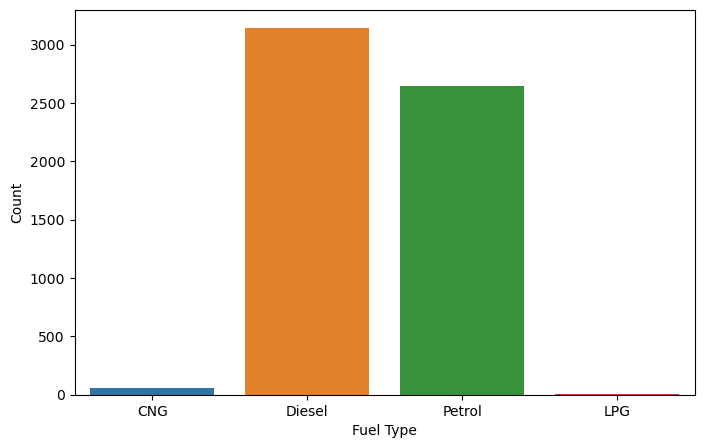

In [76]:
plt.figure(figsize = (8,5))
sns.countplot(data = train_df, x = 'fuel_type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [77]:
pd.DataFrame(train_df['fuel_type'].value_counts())

,fuel_type
Diesel,3142
Petrol,2643
CNG,55
LPG,10


* Most of the cars have Diesel engine.

# 6. Transmission

([<matplotlib.patches.Wedge at 0x1f2fdf0af40>,
 [Text(-0.673497471554717, 0.8697132606838897, 'Manual'),
  Text(0.6734975529831456, -0.8697131976265021, 'Automatic')],
 [Text(-0.36736225721166377, 0.47438905128212155, '70.97'),
  Text(0.36736230162717026, -0.47438901688718293, '29.03')])

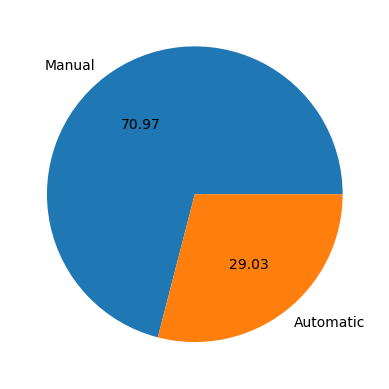

In [78]:
plt.pie(train_df['transmission'].value_counts(), labels = ['Manual', 'Automatic'], autopct = '%.2f')

In [79]:
pd.DataFrame(train_df['transmission'].value_counts())

,transmission
Manual,4152
Automatic,1698


* 72.01% cars have manual transmission.

# 7. Owner Type

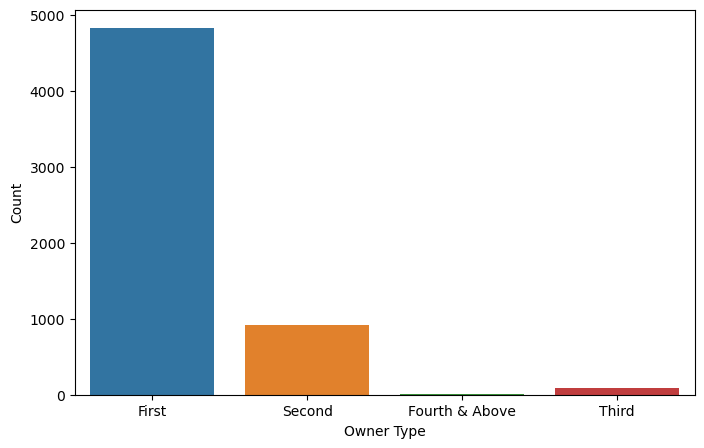

In [80]:
plt.figure(figsize = (8,5))
sns.countplot(data = train_df, x = 'owner_type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()

In [81]:
pd.DataFrame(train_df['owner_type'].value_counts())

,owner_type
First,4828
Second,920
Third,95
Fourth & Above,7


* Maximum cars are first owner.

* Cars with Fourth owner and above are very less. So, we can drop it.

In [82]:
train_df = train_df[~train_df['owner_type'].isin(['Fourth & Above'])]
train_df.reset_index(drop = True, inplace = True)

# 8. Seats

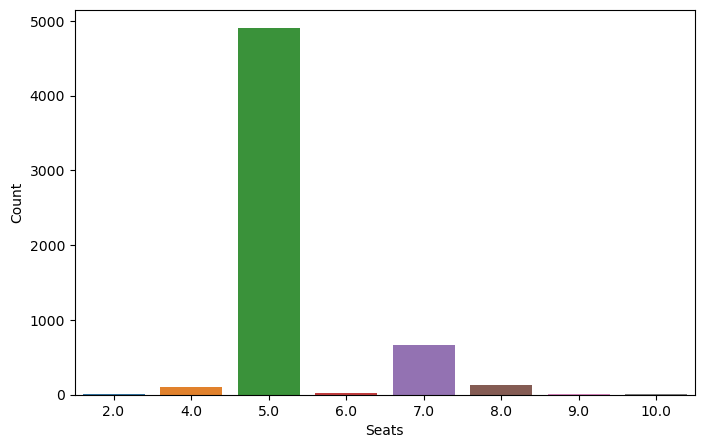

In [83]:
plt.figure(figsize = (8,5))
sns.countplot(data = train_df, x = 'seats')
plt.xlabel('Seats')
plt.ylabel('Count')
plt.show()

In [84]:
pd.DataFrame(train_df['seats'].value_counts())

,seats
5.0,4902
7.0,664
8.0,132
4.0,97
6.0,29
2.0,12
10.0,4
9.0,3


* Most of the cars are 5 seater.

In [85]:
train_df = train_df[~train_df['seats'].isin([9, 10])]
train_df.reset_index(drop = True, inplace = True)

# * Bivariate or Multivariate Analysis

# 1. Price with Brand

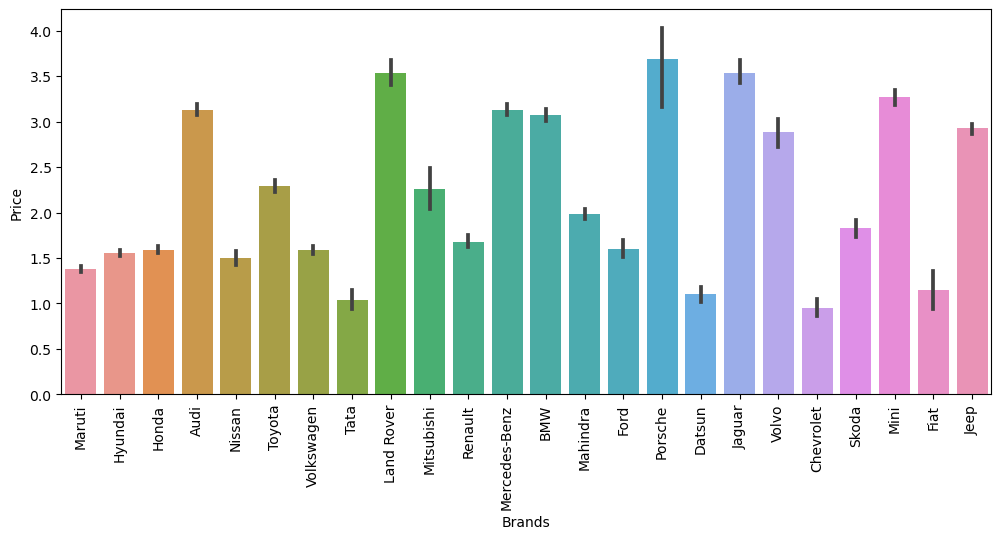

In [86]:
plt.figure(figsize = (12,5))
sns.barplot(data = train_df, y = "price", x = "brand")
plt.xlabel("Brands")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.show()

* Price of cars is mostly depends on the brand.

* Higher the brand value, higher the price.

# 2. Price with Fuel Type

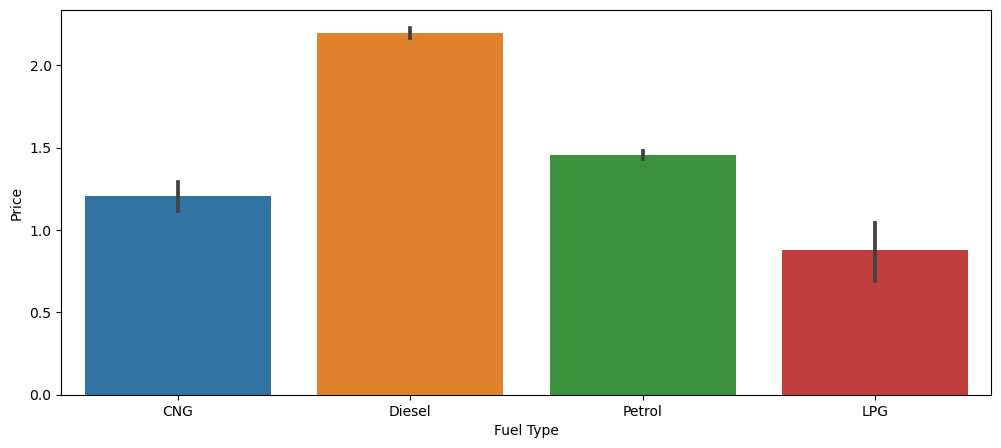

In [87]:
plt.figure(figsize = (12,5))
sns.barplot(data = train_df, y = "price", x = "fuel_type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

* Diesel cars are most costly than petrol cars.

# 3. Price with Year 

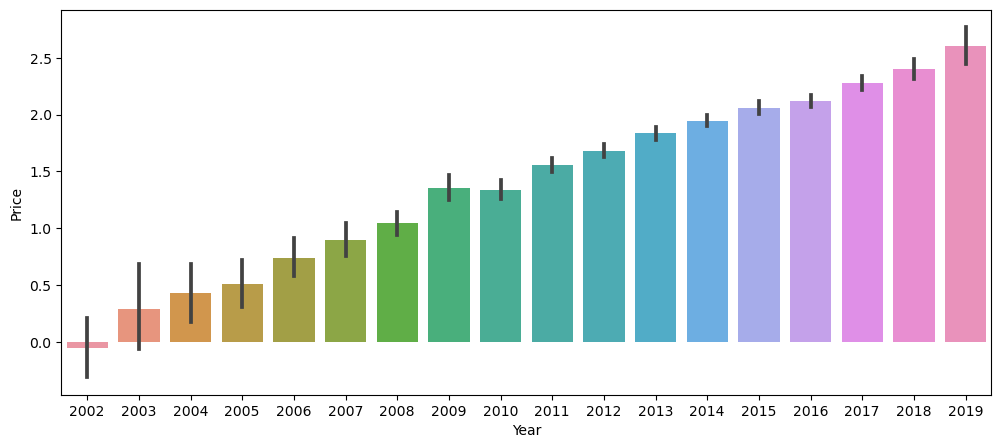

In [88]:
plt.figure(figsize = (12,5))
sns.barplot(data = train_df, y = "price", x = "year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

* As car gets older, its price get reduces.

# 4. Price with Mileage

<Figure size 800x500 with 0 Axes>

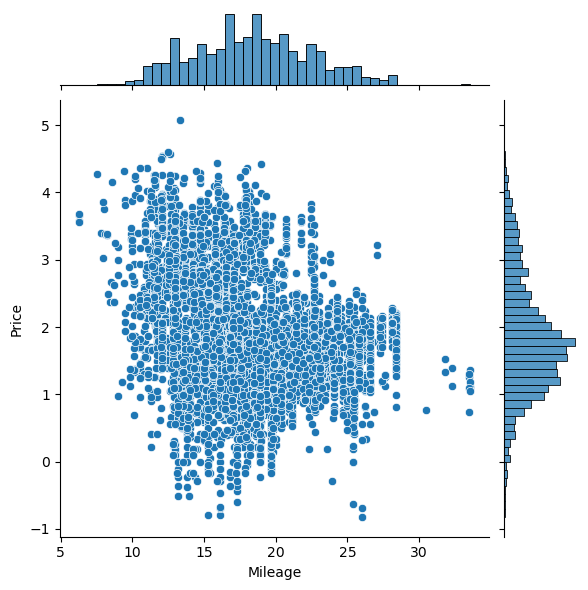

In [89]:
plt.figure(figsize = (8,5))
sns.jointplot(data = train_df, y = "price", x = "mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

* Most of the cars have normal price with good mileage.

* There are some cars whose mileage is low and price is very high, they are most likely belongs to expensive brands.

* Also there are some cars whose mileage is high and price is low, they are most likely belongs to economic class of vehicles. 

# 5. Price with power

<Figure size 800x500 with 0 Axes>

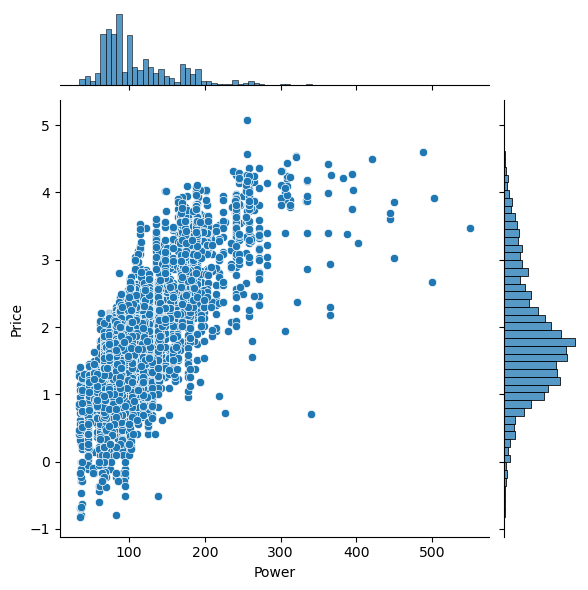

In [90]:
plt.figure(figsize = (8,5))
sns.jointplot(data = train_df, y = "price", x = "power")
plt.xlabel("Power")
plt.ylabel("Price")
plt.show()

* Cars with high bhp are more costly.

# 6. Price with Engine

<Figure size 800x500 with 0 Axes>

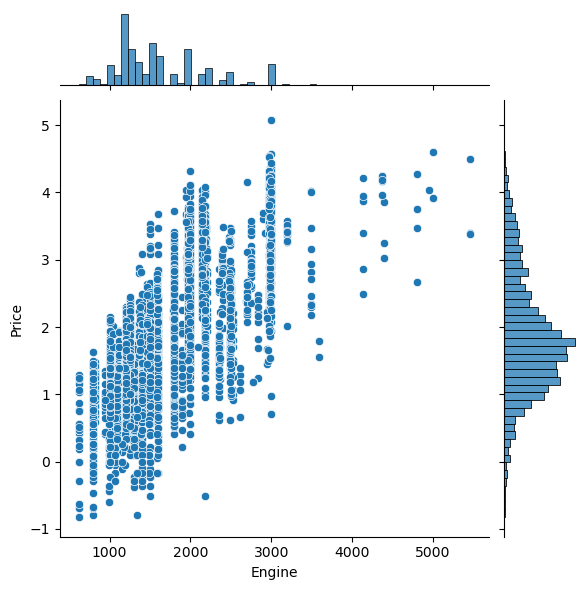

In [91]:
plt.figure(figsize = (8,5))
sns.jointplot(data = train_df, y = "price", x = "engine")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.show()

* Cars with powerful engine are more costly.

# 7. Price with Transmission

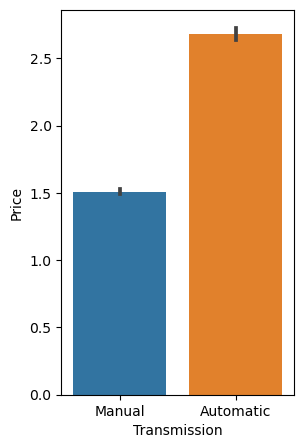

In [92]:
plt.figure(figsize = (3,5))
sns.barplot(data = train_df, y = "price", x = "transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

* Automatic transmission cars are more costly than manual cars. 

# 8. Price with Location

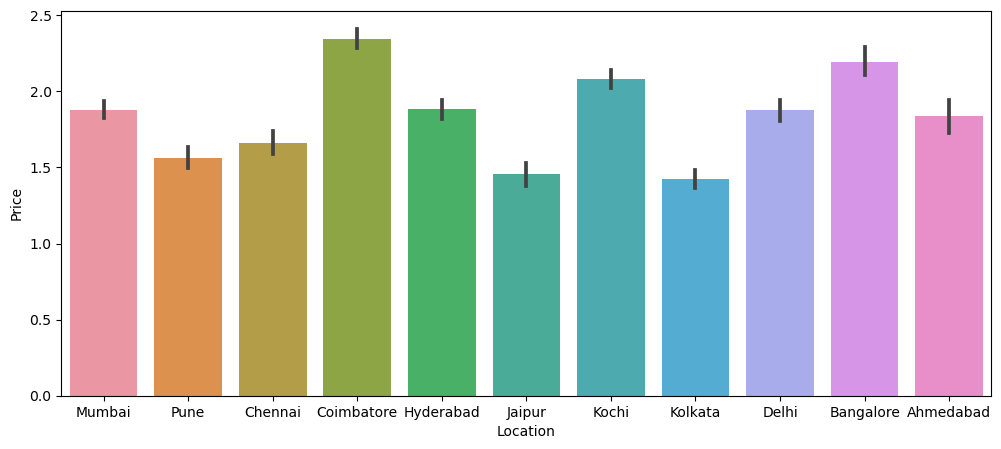

In [93]:
plt.figure(figsize = (12,5))
sns.barplot(data = train_df, y = "price", x = "location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

* Cars registered in Coimbatore are more costly.

# 9. Price with Owner Type 

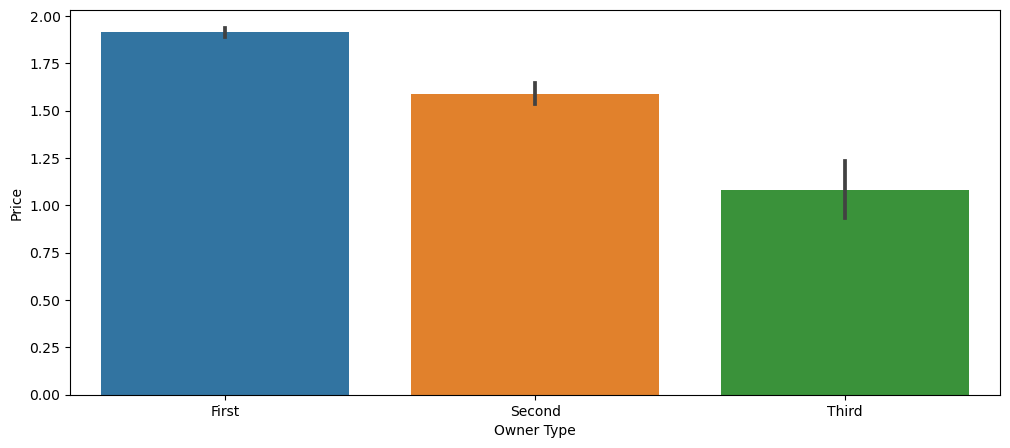

In [94]:
plt.figure(figsize = (12,5))
sns.barplot(data = train_df, y = "price", x = "owner_type")
plt.xlabel("Owner Type")
plt.ylabel("Price")
plt.show()

* First owner cars are more costly.

# 10. Brand with Fuel Type

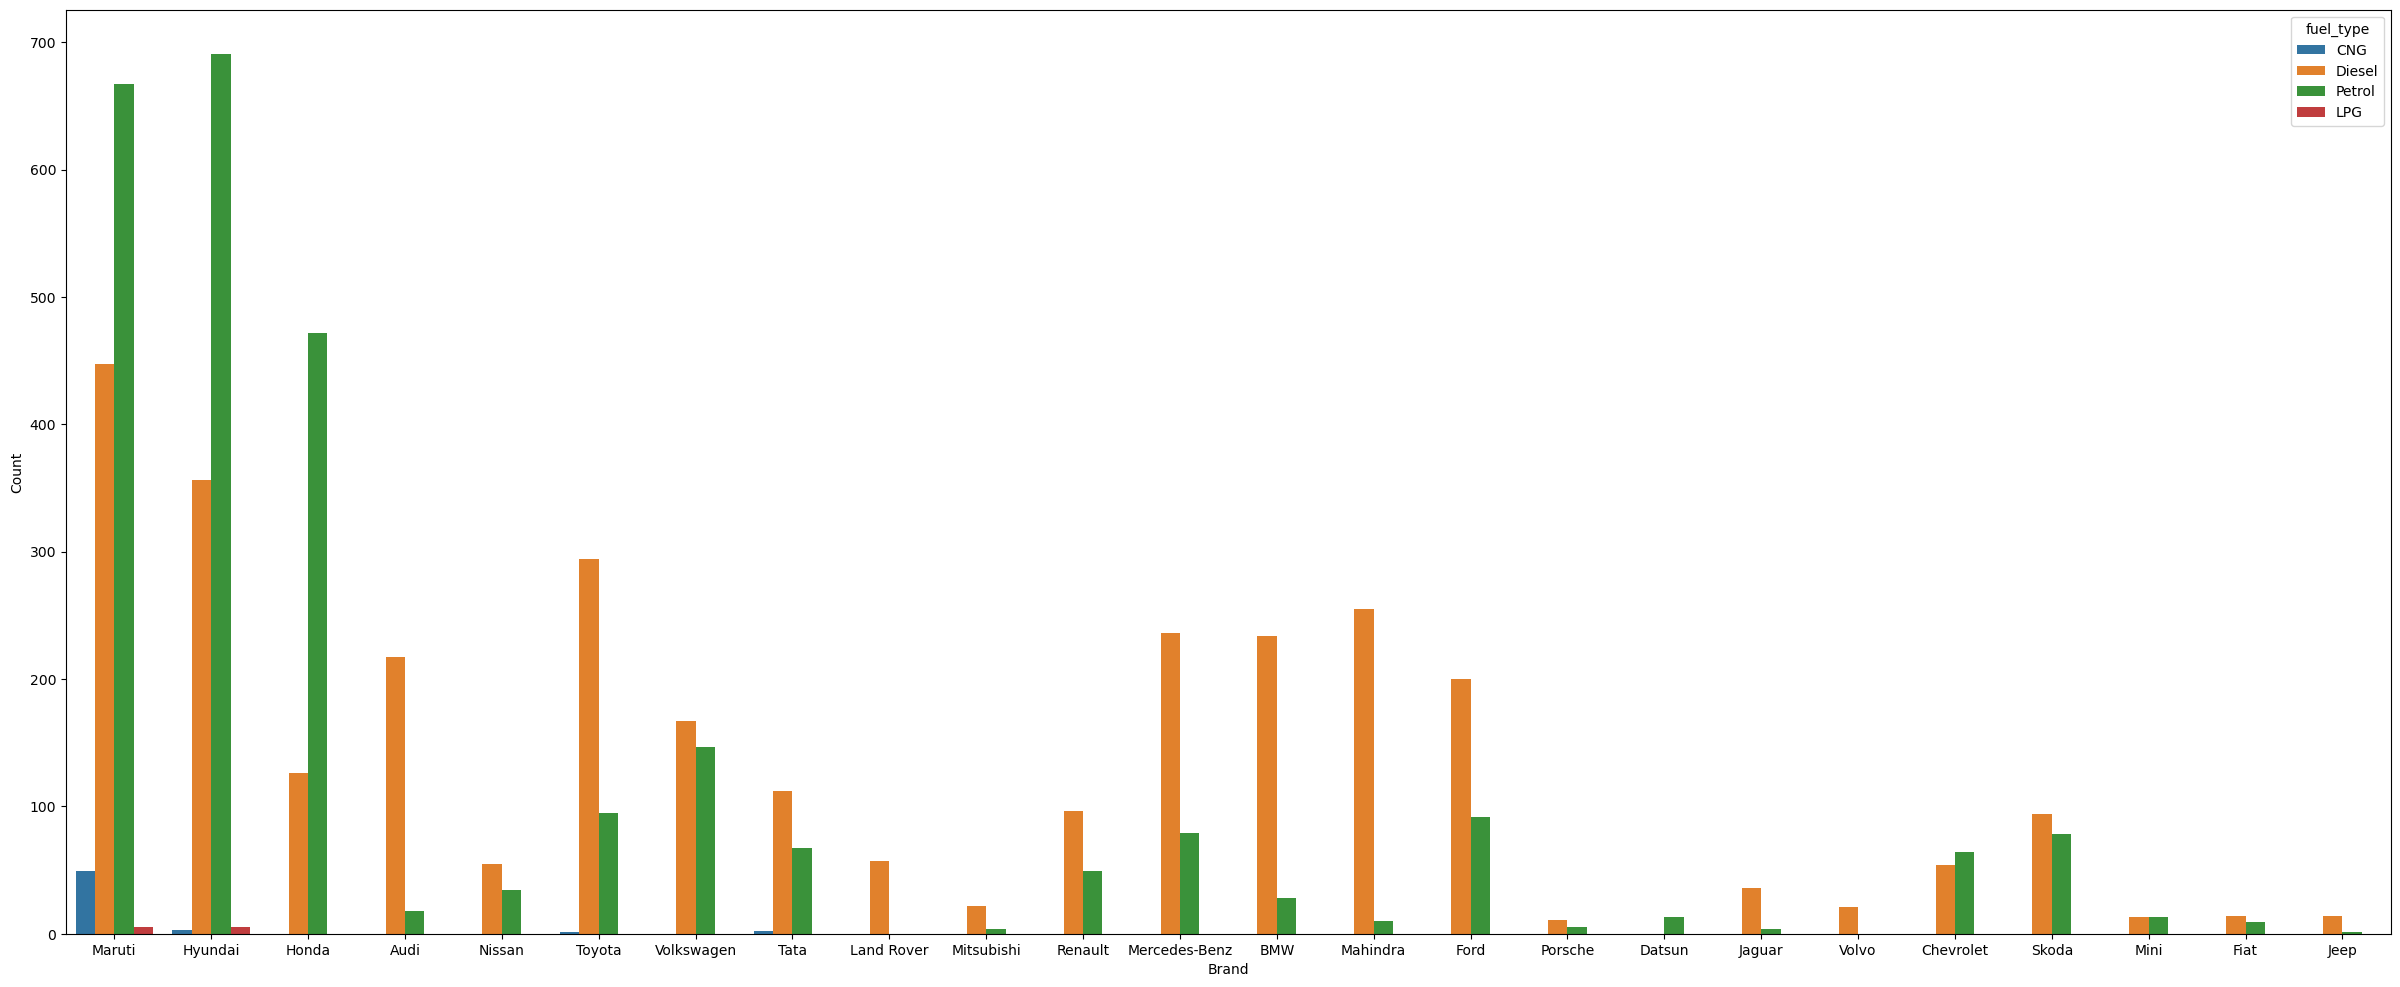

In [95]:
plt.figure(figsize = (30,12))
sns.countplot(data = train_df, x = "brand", hue = 'fuel_type')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

* Most of the brands have large number of diesel vehicles.

* Maruti, Hyundai, Chevrolet and Honda have more petrol engine vehicles.

* Datsun has only petrol engine vehicles.

* Land Rover and Volvo have only diesel engine vehicles.

# 11. Kilometers with Owner Type and Transmission

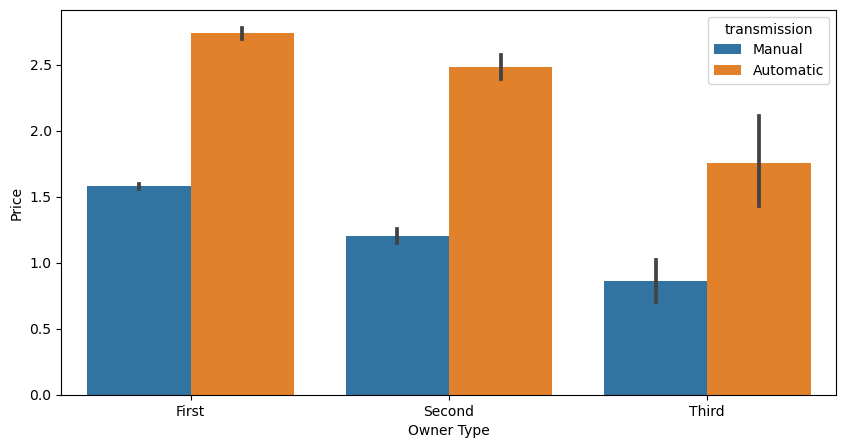

In [96]:
plt.figure(figsize = (10,5))
sns.barplot(data = train_df, x = "owner_type", y = 'price', hue = 'transmission')
plt.xlabel("Owner Type")
plt.ylabel("Price")
plt.show()

* Third owner cars are most driven.

* In all segments, manual vehicles are more driven.

Analysis Summary:

1. Maruti is most popular brand followed by Hyundai.

2. Most of the used cars are from Mumbai followed by Hyderabad.

3. Most of the used cars are manufactured in the year 2104.

4. Diesel engine cars are more preferable.

5. 72.01% cars have manual transmission.

6. Most of the cars are 5 seater.

7. Price of premium and luxury cars are very high.

8. Diesel cars are most costly than petrol cars.

9. As age of car increases, price decreases.

10. Most vehicles are reasonably priced and have good mileage.

11. High-powered cars cost more money.

12. Automatic transmission cars are more costly than manual cars. 

13. In Coiambtore, used car prices are very high.

14. Diesel cars are available from the majority of brands.

15. More used cars with petrol engines are available from Maruti, Hyundai, Chevrolet, and Honda.

16. Datsun has only petrol engine vehicles.

17. Land Rover and Volvo have only diesel engine vehicles.

18. Used CNG cars under the Tata brand cost more money.

19. The prices of used cars from the Jaguar, Skoda, and Mini brands are higher.

20. Manual automobiles are more driven in all segments.

# 3. Data Pre-Processing

# * Check for outliers

# * Boxplot

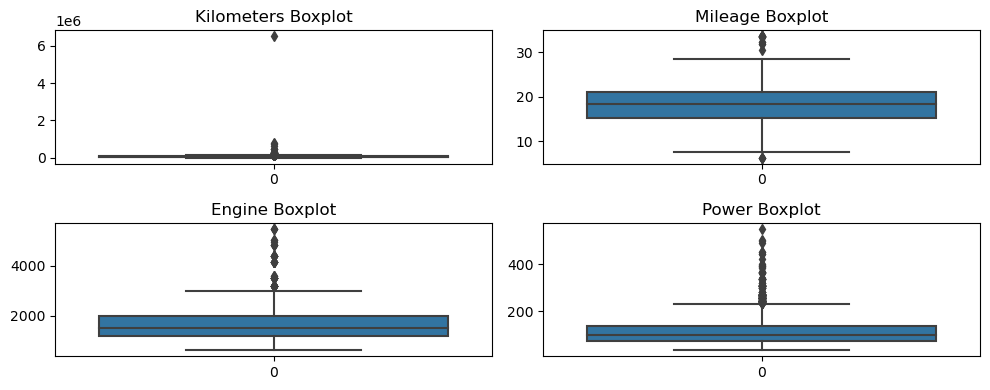

In [97]:
fig ,ax = plt.subplots(2,2,figsize=(10,4))
sns.boxplot(train_df['kilometers'], ax = ax[0,0])
sns.boxplot(train_df['mileage'], ax = ax[0,1])
sns.boxplot(train_df['engine'], ax = ax[1,0])
sns.boxplot(train_df['power'], ax = ax[1,1])
ax[0,0].set_title('Kilometers Boxplot')
ax[0,1].set_title('Mileage Boxplot')
ax[1,0].set_title('Engine Boxplot')
ax[1,1].set_title('Power Boxplot')
plt.tight_layout()
plt.show()

* There are some outliers in our data, we will remove it.

# * KDE Plot

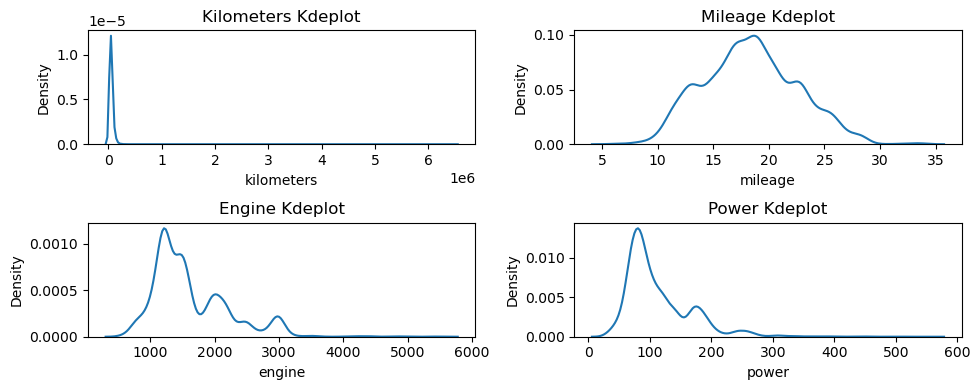

In [98]:
fig ,ax = plt.subplots(2,2,figsize=(10,4))
sns.kdeplot(train_df['kilometers'], ax = ax[0,0])
sns.kdeplot(train_df['mileage'], ax = ax[0,1])
sns.kdeplot(train_df['engine'], ax = ax[1,0])
sns.kdeplot(train_df['power'], ax = ax[1,1])
ax[0,0].set_title('Kilometers Kdeplot')
ax[0,1].set_title('Mileage Kdeplot')
ax[1,0].set_title('Engine Kdeplot')
ax[1,1].set_title('Power Kdeplot')
plt.tight_layout()
plt.show()

# 1. Remove outliers from Kilometers

In [99]:
km = train_df['kilometers']

km_Q1 = km.quantile(0.25)
km_Q3 = km.quantile(0.75)

km_IQR = km_Q3 - km_Q1

km_min = km_Q1 - (1.5 * km_IQR)
km_max = km_Q3 + (1.5 * km_IQR)

km_outliers = km[(km < km_min) | (km > km_max)] 
km_outliers

63      178000
75      230000
148     136997
158     147898
159     131765
         ...  
5677    192000
5695    180000
5736    132000
5772    140000
5776    186679
Name: kilometers, Length: 194, dtype: int64

In [100]:
train_df.drop(index= km_outliers.index, axis = 0, inplace =True)
train_df.reset_index(drop=True,inplace = True)

# 2. Remove outliers from Engine

In [101]:
eg = train_df['engine']

eg_Q1 = eg.quantile(0.25)
eg_Q3 = eg.quantile(0.75)

eg_IQR = eg_Q3 - eg_Q1

eg_min = eg_Q1 - (1.5 * eg_IQR)
eg_max = eg_Q3 + (1.5 * eg_IQR)

eg_outliers = eg[(eg < eg_min) | (eg > eg_max)] 
eg_outliers

68      4806.0
144     5461.0
425     4134.0
545     4134.0
548     3498.0
645     3498.0
655     3198.0
745     3498.0
752     3198.0
969     4367.0
1006    3198.0
1022    4134.0
1266    4367.0
1340    3198.0
1494    4134.0
1611    3198.0
1808    3498.0
1968    4806.0
2492    3198.0
2504    3597.0
2787    4806.0
2836    3198.0
2869    3498.0
2883    3198.0
2915    3198.0
2991    3198.0
3036    4367.0
3127    4395.0
3350    3498.0
3780    3498.0
3873    3498.0
3961    3198.0
4075    3498.0
4117    4134.0
4176    4951.0
4278    4134.0
4340    4395.0
4402    5461.0
4428    5461.0
4525    4395.0
4569    4367.0
4602    3198.0
4634    4134.0
4770    5000.0
4944    3198.0
4988    3198.0
5006    4134.0
5077    3498.0
5079    4367.0
5102    3198.0
5252    4806.0
5373    3498.0
5517    3498.0
5549    5000.0
5634    3597.0
Name: engine, dtype: float64

In [102]:
train_df.drop(index= eg_outliers.index, axis = 0, inplace =True)
train_df.reset_index(drop=True,inplace = True)

# 3. Remove outliers from Power

In [103]:
pw = train_df['power']

pw_Q1 = pw.quantile(0.25)
pw_Q3 = pw.quantile(0.75)

pw_IQR = pw_Q3 - pw_Q1

pw_min = pw_Q1 - (1.5 * pw_IQR)
pw_max = pw_Q3 + (1.5 * pw_IQR)

pw_outliers = pw[(pw < pw_min) | (pw > pw_max)] 
pw_outliers

37      254.80
96      241.40
100     270.90
126     362.07
139     444.00
         ...  
5390    254.80
5450    245.00
5501    241.40
5519    258.00
5577    300.00
Name: power, Length: 193, dtype: float64

In [104]:
train_df.drop(index= pw_outliers.index, axis = 0, inplace =True)
train_df.reset_index(drop=True,inplace = True)

# 4. Remove outliers from Mileage

In [105]:
mg = train_df['mileage']

mg_Q1 = pw.quantile(0.25)
mg_Q3 = pw.quantile(0.75)

mg_IQR = mg_Q3 - mg_Q1

mg_min = mg_Q1 - (1.5 * mg_IQR)
mg_max = mg_Q3 + (1.5 * mg_IQR)

mg_outliers = mg[(mg < mg_min) | (mg > mg_max)] 
mg_outliers

Series([], Name: mileage, dtype: float64)

* We do not have outliers in Mileage

In [106]:
train_df.shape

(5394, 13)

# * Correlation 

<Axes: >

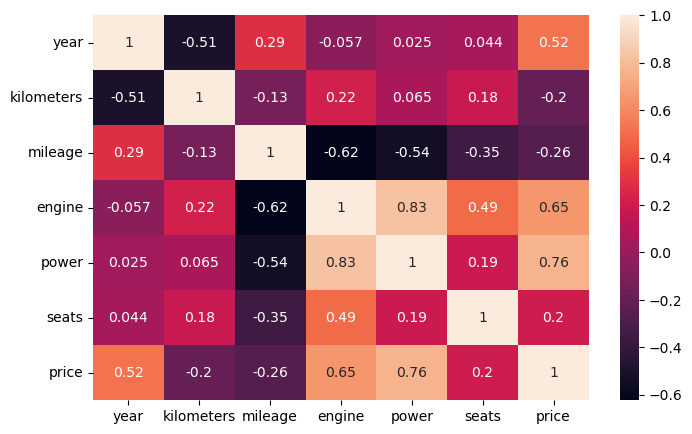

In [107]:
plt.figure(figsize = (8,5))
sns.heatmap(train_df.corr(), annot = True)

* Power and Engine have correlation of 0.83. But, we will keep both the features as both are important features.

* No other features have high correlation.

# * Create Dummies using One Hot Encoder

In [108]:
def dummy_create(d_f):
    d_f_cat = d_f.select_dtypes(include = 'object')
    d_f_num = d_f.select_dtypes(exclude = 'object')
    d_f_dummy = pd.get_dummies(d_f_cat, drop_first = True)
    new_df = pd.concat([d_f_dummy, d_f_num], axis = 1)
    return new_df

In [109]:
train_dummy = dummy_create(train_df)
train_dummy

,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,...,model_redi-GO S,model_redi-GO T,model_redi-GO T Option,year,kilometers,mileage,engine,power,seats,price
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2010,72000,26.60,998.0,58.16,5.0,0.559616
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2015,41000,19.67,1582.0,126.20,5.0,2.525729
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2011,46000,18.20,1199.0,88.70,5.0,1.504077
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2012,87000,20.77,1248.0,88.76,7.0,1.791759
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2013,40670,15.20,1968.0,140.80,5.0,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2014,27365,28.40,1248.0,74.00,5.0,1.558145
5390,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2015,100000,24.40,1120.0,71.00,5.0,1.386294
5391,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2012,55000,14.00,2498.0,112.00,8.0,1.064711
5392,0,0,0,0,0,0,0,1,0,0,...,0,0,0,2013,46000,18.90,998.0,67.10,5.0,0.974560


# * Scaling the data

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
ss = StandardScaler()

In [112]:
scaled_train_data = ss.fit_transform(train_dummy)
df_train = pd.DataFrame(scaled_train_data, columns = train_dummy.columns)
df_train

,location_Bangalore,location_Chennai,location_Coimbatore,location_Delhi,location_Hyderabad,location_Jaipur,location_Kochi,location_Kolkata,location_Mumbai,location_Pune,...,model_redi-GO S,model_redi-GO T,model_redi-GO T Option,year,kilometers,mileage,engine,power,seats,price
0,-0.244813,-0.285299,-0.341040,-0.326284,-0.367561,-0.272166,-0.35906,-0.317870,2.529659,-0.331132,...,-0.013617,-0.013617,-0.027242,-1.195746,0.705191,1.945271,-1.114018,-1.176399,-0.342035,-1.555308
1,-0.244813,-0.285299,-0.341040,-0.326284,-0.367561,-0.272166,-0.35906,-0.317870,-0.395310,3.019946,...,-0.013617,-0.013617,-0.027242,0.454086,-0.453621,0.240028,0.087460,0.499352,-0.342035,0.943725
2,-0.244813,3.505098,-0.341040,-0.326284,-0.367561,-0.272166,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,-0.865779,-0.266716,-0.121690,-0.700496,-0.424232,-0.342035,-0.354847
3,-0.244813,3.505098,-0.341040,-0.326284,-0.367561,-0.272166,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,-0.535813,1.265906,0.510701,-0.599687,-0.422755,2.391204,0.010812
4,-0.244813,-0.285299,2.932212,-0.326284,-0.367561,-0.272166,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,-0.205847,-0.465957,-0.859891,0.881587,0.858934,-0.342035,1.388712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,-0.244813,-0.285299,-0.341040,3.064811,-0.367561,-0.272166,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,0.124120,-0.963312,2.388191,-0.599687,-0.786277,-0.342035,-0.286125
5390,-0.244813,-0.285299,-0.341040,-0.326284,-0.367561,3.674235,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,0.454086,1.751860,1.403924,-0.863025,-0.860164,-0.342035,-0.504556
5391,-0.244813,-0.285299,-0.341040,-0.326284,-0.367561,3.674235,-0.35906,-0.317870,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,-0.535813,0.069713,-1.155171,1.971969,0.149621,3.757823,-0.913306
5392,-0.244813,-0.285299,-0.341040,-0.326284,-0.367561,-0.272166,-0.35906,3.145945,-0.395310,-0.331132,...,-0.013617,-0.013617,-0.027242,-0.205847,-0.266716,0.050556,-1.114018,-0.956217,-0.342035,-1.027892


# 4. Modeling

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

In [114]:
X = df_train.drop('price', axis = 1)
y = df_train['price']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

# 1. Linear Regression 

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

# * Train data

In [118]:
ypred_lr_train = model_lr.predict(X_train)

# * RMSE and R2 Score

mse_lr_train = mean_squared_error(y_train, ypred_lr_train)
rmse_lr_train = math.sqrt(mse_lr_train)
r2_score_train = r2_score(ypred_lr_train, y_train)
print("RMSE on train data: ", rmse_lr_train)
print("R2 score on train data: ", r2_score_train)

RMSE on train data:  0.16586771557775443
R2 score on train data:  0.9718802659772738


# * Test data

In [119]:
ypred_lr_test = model_lr.predict(X_test)

# * RMSE and R2 Score

mse_lr_test = mean_squared_error(y_test, ypred_lr_test)
rmse_lr_test = math.sqrt(mse_lr_test)
r2_score_test = r2_score(ypred_lr_test, y_test)
print("RMSE on test data: ", rmse_lr_test)
print("R2 score on test data: ", r2_score_test)

RMSE on test data:  56332945066149.37
R2 score on test data:  -0.0007201414805908524


In [120]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Mean Squared Error', 'Mean Absolute Error', 'R2 Score Train', 'R2 Score Test', 'Root Mean Squared Error'])

In [121]:
df11 = df_scorecard.append(pd.Series({'Model_name': 'Linear Regression', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_lr_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_lr_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_lr_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_lr_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 56332945066149.37}), ignore_index = True)

In [122]:
df11

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13


# 2. Lasso Regression

In [123]:
from sklearn.linear_model import Lasso

In [124]:
ls = Lasso(alpha = 0.01)
model_ls = ls.fit(X_train, y_train)

# * Train Data

In [125]:
ypred_ls_train = model_ls.predict(X_train)

# * RMSE and R2 Score

mse_ls_train = mean_squared_error(y_train, ypred_ls_train)
rmse_ls_train = math.sqrt(mse_ls_train)
r2_score_ls_train = r2_score(ypred_ls_train, y_train)
print("RMSE on train data: ", rmse_ls_train)
print("R2 score on train data: ", r2_score_ls_train)

RMSE on train data:  0.2511703799192531
R2 score on train data:  0.9273790727878196


# * Test Data

In [126]:
ypred_ls_test = model_ls.predict(X_test)

# * RMSE and R2 Score

mse_ls_test = mean_squared_error(y_test, ypred_ls_test)
rmse_ls_test = math.sqrt(mse_ls_test)
r2_score_ls_test = r2_score(ypred_ls_test, y_test)
print("RMSE on test data: ", rmse_ls_test)
print("R2 score on test data: ", r2_score_ls_test)

RMSE on test data:  0.27545871079603035
R2 score on test data:  0.9164008699753203


In [127]:
df12 = df11.append(pd.Series({'Model_name': 'Lasso Regression', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_ls_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_ls_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_ls_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_ls_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.27545871079603035}), ignore_index = True)

In [128]:
df12

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01


# 3. Ridge Regression

In [129]:
from sklearn.linear_model import Ridge

In [130]:
rg = Ridge(alpha = 3)
model_rg = rg.fit(X_train, y_train)

# * Train Data

In [131]:
ypred_rg_train = model_rg.predict(X_train)

# * RMSE and R2 Score

mse_rg_train = mean_squared_error(y_train, ypred_rg_train)
rmse_rg_train = math.sqrt(mse_rg_train)
r2_score_rg_train = r2_score(ypred_rg_train, y_train)
print("RMSE on train data: ", rmse_rg_train)
print("R2 score on train data: ", r2_score_rg_train)

RMSE on train data:  0.1342594577972506
R2 score on train data:  0.9814108137061412


# * Test Data

In [132]:
ypred_rg_test = model_rg.predict(X_test)

# * RMSE and R2 Score

mse_rg_test = mean_squared_error(y_test, ypred_rg_test)
rmse_rg_test = math.sqrt(mse_rg_test)
r2_score_rg_test = r2_score(ypred_rg_test, y_test)
print("RMSE on test data: ", rmse_rg_test)
print("R2 score on test data: ", r2_score_rg_test)

RMSE on test data:  0.2703968849159564
R2 score on test data:  0.9225927011914559


In [133]:
df13 = df12.append(pd.Series({'Model_name': 'Ridge Regression', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_rg_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_rg_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_rg_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_rg_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.2703968849159564}), ignore_index = True)

In [134]:
df13

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01


# 4. Decision Tree 

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
dt = DecisionTreeRegressor()
model_dt = dt.fit(X_train, y_train)

# * Train Data

In [137]:
ypred_dt_train = model_dt.predict(X_train)

# * RMSE and R2 Score

mse_dt_train = mean_squared_error(y_train, ypred_dt_train)
rmse_dt_train = math.sqrt(mse_dt_train)
r2_score_dt_train = r2_score(ypred_dt_train, y_train)
print("RMSE on train data: ", rmse_dt_train)
print("R2 score on train data: ", r2_score_dt_train)

RMSE on train data:  0.003023952538388196
R2 score on train data:  0.9999907471647648


# * Test Data

In [138]:
ypred_dt_test = model_dt.predict(X_test)

# * RMSE and R2 Score

mse_dt_test = mean_squared_error(y_test, ypred_dt_test)
rmse_dt_test = math.sqrt(mse_dt_test)
r2_score_dt_test = r2_score(ypred_dt_test, y_test)
print("RMSE on test data: ", rmse_dt_test)
print("R2 score on test data: ", r2_score_dt_test)

RMSE on test data:  0.3358095807025249
R2 score on test data:  0.8884199858052425


In [139]:
df14 = df13.append(pd.Series({'Model_name': 'Decision Tree Regressor', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_dt_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_dt_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_dt_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_dt_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.33843530297127067}), ignore_index = True)

In [140]:
df14

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01


# 5. Decision Tree GridSearchCV

In [141]:
from sklearn.model_selection import GridSearchCV as gscv

In [142]:
htmodel_dt = gscv(DecisionTreeRegressor(), param_grid = {'max_depth': [2,5,10,15,20,25],
                                                       'min_samples_leaf': [1,2,3],
                                                       'min_samples_split': [2,3,4],
                                                       'max_leaf_nodes': [2,6,10,14,18,20],
                                                       'min_impurity_decrease': [0,1,2]}, cv = 5)

In [143]:
htmodel_dt.fit(X, y)
print(htmodel_dt.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [144]:
model_dt_gscv = DecisionTreeRegressor(max_depth = htmodel_dt.best_params_.get('max_depth'),
         min_samples_leaf = htmodel_dt.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel_dt.best_params_.get('min_samples_split'),
         max_leaf_nodes = htmodel_dt.best_params_.get('max_leaf_nodes'),
         min_impurity_decrease = htmodel_dt.best_params_.get('min_impurity_decrease')).fit(X_train, y_train)

# * Train Data

In [145]:
ypred_dt_gscv_train = model_dt_gscv.predict(X_train)

# * RMSE and R2 Score

mse_dt_gscv_train = mean_squared_error(y_train, ypred_dt_gscv_train)
rmse_dt_gscv_train = math.sqrt(mse_dt_gscv_train)
r2_score_dt_gscv_train = r2_score(ypred_dt_gscv_train, y_train)
print("RMSE on train data: ", rmse_dt_gscv_train)
print("R2 score on train data: ", r2_score_dt_gscv_train)

RMSE on train data:  0.4063481918626281
R2 score on train data:  0.7994083498425125


# * Test Data

In [146]:
ypred_dt_gscv_test = model_dt_gscv.predict(X_test)

# * RMSE and R2 Score

mse_dt_gscv_test = mean_squared_error(y_test, ypred_dt_gscv_test)
rmse_dt_gscv_test = math.sqrt(mse_dt_gscv_test)
r2_score_dt_gscv_test = r2_score(ypred_dt_gscv_test, y_test)
print("RMSE on test data: ", rmse_dt_gscv_test)
print("R2 score on test data: ", r2_score_dt_gscv_test)

RMSE on test data:  0.4281828880385067
R2 score on test data:  0.784318683199796


In [147]:
df15 = df14.append(pd.Series({'Model_name': 'Decision Tree Regressor with GSCV', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_dt_gscv_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_dt_gscv_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_dt_gscv_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_dt_gscv_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.42818288803850657}), ignore_index = True)

In [148]:
df15

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01
4,Decision Tree Regressor with GSCV,[0.18334058560899633],[0.32311601037734267],[0.7994083498425125],[0.784318683199796],4.281829e-01


# 6. Random Forest

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,y_train)

# * Train Data

In [151]:
ypred_rf_train = model_rf.predict(X_train)

# * RMSE and R2 Score

mse_rf_train = mean_squared_error(y_train, ypred_rf_train)
rmse_rf_train = math.sqrt(mse_rf_train)
r2_score_rf_train = r2_score(ypred_rf_train, y_train)
print("RMSE on train data: ", rmse_rf_train)
print("R2 score on train data: ", r2_score_rf_train)

RMSE on train data:  0.09209471036067522
R2 score on train data:  0.9909955473854974


# * Test Data

In [152]:
ypred_rf_test = model_rf.predict(X_test)

# * RMSE and R2 Score

mse_rf_test = mean_squared_error(y_test, ypred_rf_test)
rmse_rf_test = math.sqrt(mse_rf_test)
r2_score_rf_test = r2_score(ypred_rf_test, y_test)
print("RMSE on test data: ", rmse_rf_test)
print("R2 score on test data: ", r2_score_rf_test)

RMSE on test data:  0.25228129554487927
R2 score on test data:  0.9317357824235049


In [153]:
df16 = df15.append(pd.Series({'Model_name': 'Random Forest Regressor', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_rf_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_rf_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_rf_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_rf_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.2513014594647335}), ignore_index = True)

In [154]:
df16

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01
4,Decision Tree Regressor with GSCV,[0.18334058560899633],[0.32311601037734267],[0.7994083498425125],[0.784318683199796],4.281829e-01
5,Random Forest Regressor,[0.06364585208180272],[0.17963924397005412],[0.9909955473854974],[0.9317357824235049],2.513015e-01


# 7. Bagging

In [155]:
from sklearn.ensemble import BaggingRegressor

In [156]:
bg = BaggingRegressor(n_estimators = 150, random_state = 102)
model_bg = bg.fit(X_train,y_train)

# * Train Data

In [157]:
ypred_bg_train = model_bg.predict(X_train)

# * RMSE and R2 Score

mse_bg_train = mean_squared_error(y_train, ypred_bg_train)
rmse_bg_train = math.sqrt(mse_bg_train)
r2_score_bg_train = r2_score(ypred_bg_train, y_train)
print("RMSE on train data: ", rmse_bg_train)
print("R2 score on train data: ", r2_score_bg_train)

RMSE on train data:  0.09099464641591554
R2 score on train data:  0.9912038565816421


# * Test Data

In [158]:
ypred_bg_test = model_bg.predict(X_test)

# * RMSE and R2 Score

mse_bg_test = mean_squared_error(y_test, ypred_bg_test)
rmse_bg_test = math.sqrt(mse_bg_test)
r2_score_bg_test = r2_score(ypred_bg_test, y_test)
print("RMSE on test data: ", rmse_bg_test)
print("R2 score on test data: ", r2_score_bg_test)

RMSE on test data:  0.2508124265598666
R2 score on test data:  0.9324792586366031


In [159]:
df17 = df16.append(pd.Series({'Model_name': 'Bagging Regressor', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_bg_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_bg_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_bg_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_bg_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.2508124265598666}), ignore_index = True)

In [160]:
df17

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01
4,Decision Tree Regressor with GSCV,[0.18334058560899633],[0.32311601037734267],[0.7994083498425125],[0.784318683199796],4.281829e-01
5,Random Forest Regressor,[0.06364585208180272],[0.17963924397005412],[0.9909955473854974],[0.9317357824235049],2.513015e-01
6,Bagging Regressor,[0.06290687331684847],[0.17884626371073478],[0.9912038565816421],[0.9324792586366031],2.508124e-01


# 8. AdaBoost Regressor

In [161]:
from sklearn.ensemble import AdaBoostRegressor

In [162]:
ab = AdaBoostRegressor(n_estimators = 150, learning_rate = 3, random_state = 102, loss = 'linear')
model_ab = ab.fit(X_train,y_train)

# * Train Data

In [163]:
ypred_ab_train = model_ab.predict(X_train)

# * RMSE and R2 Score

mse_ab_train = mean_squared_error(y_train, ypred_ab_train)
rmse_ab_train = math.sqrt(mse_ab_train)
r2_score_ab_train = r2_score(ypred_ab_train, y_train)
print("RMSE on train data: ", rmse_ab_train)
print("R2 score on train data: ", r2_score_ab_train)

RMSE on train data:  0.3631947760181684
R2 score on train data:  0.8350998738881716


# * Test Data

In [164]:
ypred_ab_test = model_ab.predict(X_test)

# * RMSE and R2 Score

mse_ab_test = mean_squared_error(y_test, ypred_ab_test)
rmse_ab_test = math.sqrt(mse_ab_test)
r2_score_ab_test = r2_score(ypred_ab_test, y_test)
print("RMSE on test data: ", rmse_ab_test)
print("R2 score on test data: ", r2_score_ab_test)

RMSE on test data:  0.36310050831688206
R2 score on test data:  0.841049554983893


In [165]:
df18 = df17.append(pd.Series({'Model_name': 'AdaBoost Regressor', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_ab_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_ab_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_ab_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_ab_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.36310050831688206}), ignore_index = True)

In [166]:
df18

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01
4,Decision Tree Regressor with GSCV,[0.18334058560899633],[0.32311601037734267],[0.7994083498425125],[0.784318683199796],4.281829e-01
5,Random Forest Regressor,[0.06364585208180272],[0.17963924397005412],[0.9909955473854974],[0.9317357824235049],2.513015e-01
6,Bagging Regressor,[0.06290687331684847],[0.17884626371073478],[0.9912038565816421],[0.9324792586366031],2.508124e-01
7,AdaBoost Regressor,[0.13184197913997814],[0.2911880728347536],[0.8350998738881716],[0.841049554983893],3.631005e-01


# 9. XGBoost Regressor

In [167]:
import xgboost

In [168]:
xg = xgboost.XGBRegressor()
model_xg = xg.fit(X_train, y_train)

# * Train Data

In [169]:
ypred_xg_train = model_xg.predict(X_train)

# * RMSE and R2 Score

mse_xg_train = mean_squared_error(y_train, ypred_xg_train)
rmse_xg_train = math.sqrt(mse_xg_train)
r2_score_xg_train = r2_score(ypred_xg_train, y_train)
print("RMSE on train data: ", rmse_xg_train)
print("R2 score on train data: ", r2_score_xg_train)

RMSE on train data:  0.14492980858685803
R2 score on train data:  0.9778126734807189


# * Test Data

In [170]:
ypred_xg_test = model_xg.predict(X_test)

# * RMSE and R2 Score

mse_xg_test = mean_squared_error(y_test, ypred_xg_test)
rmse_xg_test = math.sqrt(mse_xg_test)
r2_score_xg_test = r2_score(ypred_xg_test, y_test)
print("RMSE on test data: ", rmse_xg_test)
print("R2 score on test data: ", r2_score_xg_test)

RMSE on test data:  0.23223594463313602
R2 score on test data:  0.9444040463152604


In [171]:
df19 = df18.append(pd.Series({'Model_name': 'XGBoost Regressor', 
                     'Mean Squared Error': mean_squared_error(y_test, ypred_xg_test, multioutput='raw_values'), 
                     'Mean Absolute Error': mean_absolute_error(y_test, ypred_xg_test, multioutput='raw_values'),
                     'R2 Score Train': r2_score(ypred_xg_train, y_train, multioutput='raw_values'),
                     'R2 Score Test': r2_score(ypred_xg_test, y_test, multioutput='raw_values'),
                     'Root Mean Squared Error': 0.23223594463313602}), ignore_index = True)

In [172]:
df19

,Model_name,Mean Squared Error,Mean Absolute Error,R2 Score Train,R2 Score Test,Root Mean Squared Error
0,Linear Regression,[3.1734006998258025e+27],[16141003327114.254],[0.9718802659772738],[-0.0007201414805908524],5.633295e+13
1,Lasso Regression,[0.07587750135341108],[0.21218717618548577],[0.9273790727878196],[0.9164008699753203],2.754587e-01
2,Ridge Regression,[0.07311447537225298],[0.1846822586797709],[0.9814108137061412],[0.9225927011914559],2.703969e-01
3,Decision Tree Regressor,[0.1127680744916056],[0.23373367809446252],[0.9999907471647648],[0.8884199858052425],3.384353e-01
4,Decision Tree Regressor with GSCV,[0.18334058560899633],[0.32311601037734267],[0.7994083498425125],[0.784318683199796],4.281829e-01
5,Random Forest Regressor,[0.06364585208180272],[0.17963924397005412],[0.9909955473854974],[0.9317357824235049],2.513015e-01
6,Bagging Regressor,[0.06290687331684847],[0.17884626371073478],[0.9912038565816421],[0.9324792586366031],2.508124e-01
7,AdaBoost Regressor,[0.13184197913997814],[0.2911880728347536],[0.8350998738881716],[0.841049554983893],3.631005e-01
8,XGBoost Regressor,[0.05393353397964502],[0.17022895490249298],[0.9778126734807189],[0.9444040463152604],2.322359e-01


# * XGBoost is providing best results with R2 Score of "0.977" on                     "Training data" and "0.944" on "Testing data".